# Hypothesis_test_kidney_disease_dataset

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [43]:
pd.set_option('display.max_columns',None)

In [44]:
df=pd.read_csv('kidney_disease_train.csv')
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,157,62.0,70.0,1.025,3.0,0.0,normal,abnormal,notpresent,notpresent,122.0,42.0,1.7,136.0,4.7,12.6,39.0,7900,3.9,yes,yes,no,good,no,no,ckd
1,109,54.0,70.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,233.0,50.1,1.9,NaN,NaN,11.7,NaN,NaN,NaN,no,yes,no,good,no,no,ckd
2,17,47.0,80.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,114.0,87.0,5.2,139.0,3.7,12.1,NaN,NaN,NaN,yes,no,no,poor,no,no,ckd
3,347,43.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,108.0,25.0,1.0,144.0,5.0,17.8,43.0,7200,5.5,no,no,no,good,no,no,notckd
4,24,42.0,100.0,1.015,4.0,0.0,normal,abnormal,notpresent,present,NaN,50.0,1.4,129.0,4.0,11.1,39.0,8300,4.6,yes,no,no,poor,no,no,ckd


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              280 non-null    int64  
 1   age             275 non-null    float64
 2   bp              271 non-null    float64
 3   sg              244 non-null    float64
 4   al              245 non-null    float64
 5   su              242 non-null    float64
 6   rbc             173 non-null    object 
 7   pc              230 non-null    object 
 8   pcc             276 non-null    object 
 9   ba              276 non-null    object 
 10  bgr             247 non-null    float64
 11  bu              266 non-null    float64
 12  sc              268 non-null    float64
 13  sod             213 non-null    float64
 14  pot             212 non-null    float64
 15  hemo            241 non-null    float64
 16  pcv             229 non-null    float64
 17  wc              203 non-null    obj

In [46]:
df.describe(percentiles=(0.01,0.05,0.1,0.25,0.5,0.75,0.90,0.99)).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,99%,max
id,280.0,202.928571,111.988168,1.000,5.580,23.95,43.90,110.50,202.00,302.25,354.200,393.840,399.000
age,275.0,51.454545,17.476176,2.000,5.480,19.10,26.40,42.00,55.00,65.00,71.600,80.260,90.000
bp,271.0,76.051661,14.256289,50.000,50.000,60.00,60.00,70.00,70.00,80.00,90.000,113.000,180.000
sg,244.0,1.017439,0.005746,1.005,1.005,1.01,1.01,1.01,1.02,1.02,1.025,1.025,1.025
al,245.0,1.024490,1.375805,0.000,0.000,0.00,0.00,0.00,0.00,2.00,3.000,4.000,5.000
su,242.0,0.438017,1.073193,0.000,0.000,0.00,0.00,0.00,0.00,0.00,2.000,4.000,5.000
bgr,247.0,150.186235,77.357144,70.000,71.840,80.30,87.60,100.00,124.00,171.50,250.400,436.880,490.000
bu,266.0,56.983835,51.456635,10.000,15.000,17.00,19.00,27.25,41.00,64.75,114.500,264.800,391.000
sc,268.0,3.006157,5.850085,0.400,0.500,0.50,0.60,0.90,1.30,2.80,6.430,19.980,76.000
sod,213.0,137.255869,11.677123,4.500,113.120,124.60,130.00,135.00,138.00,141.00,147.000,150.000,163.000


In [47]:
df.classification.value_counts()

ckd       174
notckd    106
Name: classification, dtype: int64

In [48]:
df_ckd=df[df['classification']=='ckd']

In [49]:
df_ckd.shape

(174, 26)

In [50]:
df_ckd.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,157,62.0,70.0,1.025,3.0,0.0,normal,abnormal,notpresent,notpresent,122.0,42.0,1.7,136.0,4.7,12.6,39.0,7900,3.9,yes,yes,no,good,no,no,ckd
1,109,54.0,70.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,233.0,50.1,1.9,NaN,NaN,11.7,NaN,NaN,NaN,no,yes,no,good,no,no,ckd
2,17,47.0,80.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,114.0,87.0,5.2,139.0,3.7,12.1,NaN,NaN,NaN,yes,no,no,poor,no,no,ckd
4,24,42.0,100.0,1.015,4.0,0.0,normal,abnormal,notpresent,present,NaN,50.0,1.4,129.0,4.0,11.1,39.0,8300,4.6,yes,no,no,poor,no,no,ckd
5,175,60.0,50.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,261.0,58.0,2.2,113.0,3.0,NaN,NaN,4200,3.4,yes,no,no,good,no,no,ckd


In [51]:
df_ckd.describe(percentiles=(0.01,0.05,0.1,0.25,0.5,0.75,0.90,0.99)).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,99%,max
id,174.0,130.040230,71.213134,1.000,3.460,13.65,28.30,67.25,135.500,190.750,221.70,244.270,249.000
age,169.0,55.000000,17.550946,2.000,3.680,12.20,33.80,48.00,60.000,66.000,72.00,81.640,90.000
bp,167.0,79.161677,16.110057,50.000,50.000,60.00,60.00,70.00,80.000,90.000,100.00,126.800,180.000
sg,141.0,1.013723,0.004448,1.005,1.005,1.01,1.01,1.01,1.015,1.015,1.02,1.025,1.025
al,142.0,1.767606,1.397391,0.000,0.000,0.00,0.00,0.25,2.000,3.000,4.00,4.000,5.000
su,139.0,0.762590,1.327429,0.000,0.000,0.00,0.00,0.00,0.000,1.000,3.00,4.620,5.000
bgr,147.0,178.646259,88.556677,70.000,74.920,84.60,92.00,110.50,157.000,219.500,297.40,455.640,490.000
bu,166.0,71.570482,60.079167,15.000,15.000,19.00,22.00,32.00,52.500,89.750,147.00,313.550,391.000
sc,167.0,4.304491,7.106767,0.600,0.666,0.83,1.00,1.40,2.300,4.200,9.66,26.720,76.000
sod,112.0,133.334821,14.314264,4.500,104.990,121.10,125.10,131.00,135.000,139.000,141.00,146.890,163.000


## Claim 1

### Hypothesis definition

***
There is claim that the average age of patient who has chronic kidney disease is more that 50.   
So, we have to collect samples out of the dataset and apply Z-test to come to a conclusion
- H0 : Average age of patients having chronic kidney disease is less than or equal to 50. (Mu <= 50)
- H1 : Average age of patients having chronic kidney disease is more than 50. (Mu > 50)
***

### Distribution of population Age

<AxesSubplot:xlabel='age', ylabel='Density'>

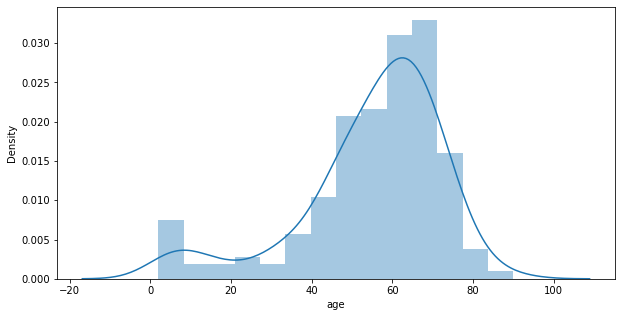

In [55]:
plt.figure(figsize=(10,5))
sns.distplot(df_ckd['age'])

The polpulation age having chronic kidney disease is not normally distributed.

### Distribution of samples mean of age

[55.43, 53.69, 57.17, 51.03, 59.42, 53.76, 54.56, 52.89, 53.33, 54.21, 54.74, 55.84, 55.6, 56.04, 55.65, 56.45, 56.75, 58.19, 51.56, 53.48, 53.57, 55.49, 54.08, 57.02, 52.57, 53.26, 53.9, 55.66, 58.36, 54.47, 56.03, 55.54, 55.6, 55.28, 56.04, 55.43, 55.59, 54.16, 53.84, 57.73, 55.54, 56.82, 52.11, 54.79, 53.91, 54.64, 54.57, 56.46, 55.55, 56.12, 53.22, 56.12, 56.01, 55.95, 54.84, 53.07, 56.15, 56.47, 57.64, 56.36, 57.38, 51.57, 54.38, 54.31, 55.16, 55.63, 56.35, 52.5, 54.97, 54.75, 54.33, 51.53, 52.74, 55.81, 54.47, 55.06, 55.43, 54.88, 56.97, 57.14, 54.22, 54.82, 52.23, 52.35, 54.11, 50.22, 55.81, 52.74, 54.59, 56.46, 54.36, 53.6, 56.7, 56.4, 55.54, 55.69, 56.36, 52.21, 56.13, 57.3]


<AxesSubplot:ylabel='Density'>

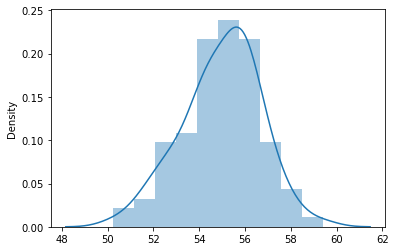

In [77]:
sample_mean_list=[]
for i in range(100):
    sample_mean_list.append(np.random.choice(df_ckd['age'][df_ckd['age'].notna()],100).mean())
print(sample_mean_list)
sns.distplot(sample_mean_list)

***
- 100 age samples of sample size 100 are picked randomly from the dataset.   
- Mean of each sample is appended to list and plotted distribution.   
- According CLT distribution of sample mean is normal.   
***

### Z-test

In [100]:
from statsmodels.stats.weightstats import ztest
from statsmodels.stats.weightstats import zconfint

#******Hypothesis definition*******
# H0 : Mue<=50
# H1 : Mue>50

mean_h0=50
ztest_score,p_value=ztest(sample_mean_list,value=mean_h0,alternative='larger')

print('p value is : ',p_value)
print('ztest score is : ',ztest_score)

#***** 95% confidence level*****
min_val,max_val=zconfint(sample_mean_list,value=0,alpha=0.05,alternative='two-sided')
print(f'With 95% confidence avearage age will lie between {min_val} and {max_val}')

#***** 99% confidence level*****
min_val,max_val=zconfint(sample_mean_list,value=0,alpha=0.01,alternative='two-sided')
print(f'With 99% confidence avearage age will lie between {min_val} and {max_val}')

p value is :  3.075888826448444e-185
ztest score is :  29.002315381245296
With 95% confidence avearage age will lie between 54.633663329957095 and 55.30533667004293
With 99% confidence avearage age will lie between 54.52813580008293 and 55.41086419991709


### Inference

***
From above ztest we can infer,
- P-value is almost near to zero which is less than critcal value (alpha) i.e 0.005
- Hence we can reject the null hypothesis which indicates that the average age of patients having chronic kidney disease is more than 50.
- And also with 95% confidence level we can say that the average age will lie between the range 54.63 and 55.30.
- And also with 99% confidence level we can say that the average age will lie between the range 54.52 and 55.41.
***